<a href="https://colab.research.google.com/github/Vikas-KM/machine-learning/blob/master/ML_Projects/Movie%20Recommendation%20System/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

Movielens Dataset Referred
- https://grouplens.org/datasets/movielens/

### About the dataset
- This **dataset (ml-25m)** describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. **It contains 25000095 ratings and 1093360 tag applications across 62423 movies.** These data were created by 162541 users between January 09, 1995 and November 21, 2019. **This dataset was generated on November 21, 2019.**
- Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

### Ratings Data File Structure (ratings.csv)
- All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

- userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

- Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

- Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


### Tags Data File Structure (tags.csv)
- All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

- userId,movieId,tag,timestamp
- The lines within this file are ordered first by userId, then, within user, by movieId.

- Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

- Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Movies Data File Structure (movies.csv)
- Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

- movieId,title,genres
- Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

- Genres are a pipe-separated list, and are selected from the following:

  - Action
  - Adventure
  - Animation
  - Children's
  - Comedy
  - Crime
  - Documentary
  - Drama
  - Fantasy
  - Film-Noir
  - Horror
  - Musical
  - Mystery
  - Romance
  - Sci-Fi
  - Thriller
  - War
  - Western
  - (no genres listed)

## Content Based Movie Recommendation System

In [1]:
# importing some standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Mounting the google drive to download the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Lets Import the movielens dataset
# using movielens 25M dataset

! ls /content/drive/MyDrive/ML_Datasets/movielens_dataset

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


## Preprocessing of Movies dataset

### movie.csv that contains movie information:

In [5]:
df_movies = pd.read_csv('/content/drive/MyDrive/ML_Datasets/movielens_dataset/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# importing the ratings dataset
df_ratings = pd.read_csv('/content/drive/MyDrive/ML_Datasets/movielens_dataset/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
# shape of the movies dataset
df_movies.shape

(62423, 3)

In [8]:
# columns in the movies dataset
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
# lets check if there any null values
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
# genre needs to be seprated, before we can figure which genre is dominating
df_movies['genres'].value_counts()

Drama                                                  9056
Comedy                                                 5674
(no genres listed)                                     5062
Documentary                                            4731
Comedy|Drama                                           2386
                                                       ... 
Adventure|Animation|Children|Fantasy|Mystery|Sci-Fi       1
Comedy|Fantasy|Mystery|Romance                            1
Comedy|Drama|Musical|IMAX                                 1
Action|Adventure|Animation|Comedy|Thriller                1
Adventure|Animation|Horror|Sci-Fi|Thriller                1
Name: genres, Length: 1639, dtype: int64

### Observations from the movies.csv dataset
- Title contains the year, needs to be cleaned
- Single movie can have many genres, needs to split
- WOW - No Null data

In [11]:
print(len(df_movies['movieId'].unique()))
print(len(df_movies['title'].unique()))

62423
62325


In [12]:
# list of movies which are duplicate
df_movies_dup = df_movies[df_movies.duplicated(subset=['title'], keep=False)]
df_movies_dup.head()

,movieId,title,genres
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
1710,1788,Men with Guns (1997),Action|Drama
2553,2644,Dracula (1931),Horror
2759,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
3454,3553,Gossip (2000),Drama|Thriller


In [13]:
df_movies_dup.shape

(196, 3)

In [14]:
df_movies_dup[df_movies_dup['title'] == 'Gossip (2000)']

,movieId,title,genres
3454,3553,Gossip (2000),Drama|Thriller
44375,168088,Gossip (2000),Comedy|Drama


In [15]:
df_movies_dup[df_movies_dup['title'] == 'Inside (2012)']

,movieId,title,genres
28373,131556,Inside (2012),(no genres listed)
34147,144748,Inside (2012),Horror


In [16]:
df_movies_dup[df_movies_dup['title'] == 'Saturn 3 (1980)']

,movieId,title,genres
2759,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
44502,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [17]:
df_movies_dup[df_movies_dup['genres'] == '(no genres listed)']


,movieId,title,genres
28373,131556,Inside (2012),(no genres listed)
31457,138656,Black Field (2009),(no genres listed)
34186,144830,The Tunnel (1933),(no genres listed)
39216,156686,Another World (2014),(no genres listed)
41061,160868,Escalation (1968),(no genres listed)
48048,175857,Family Life (1971),(no genres listed)
49071,177993,Escape Room (2017),(no genres listed)
49221,178403,The Forest (2016),(no genres listed)
49867,179783,Let There Be Light (2017),(no genres listed)
50735,181675,Apparition (2014),(no genres listed)


# Observations:
- 98 movies are duplicate, need to drop list of duplicate movie entries which have ' no genre listed' present
- then remove the rest of the duplicates 
- In most cases the first entry has more genres
- no genres listes of duplicates to be dropped first

In [18]:
# dropping all the duplicates with no genre listes category
df_movies_dup = df_movies_dup[df_movies_dup['genres'] != '(no genres listed)']
df_movies_dup

,movieId,title,genres
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
1710,1788,Men with Guns (1997),Action|Drama
2553,2644,Dracula (1931),Horror
2759,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
3454,3553,Gossip (2000),Drama|Thriller
...,...,...,...
61521,206117,The Lonely Island Presents: The Unauthorized B...,Comedy
61525,206125,Lost & Found (2018),Comedy|Drama
61697,206674,Camino (2016),Comedy
61800,206925,The Plague (2006),Documentary


In [19]:
# checking if any no genre present
df_movies_dup[df_movies_dup['genres'] == '(no genres listed)']

,movieId,title,genres


In [20]:
df_movies_dup.drop_duplicates(subset='title', inplace = True, keep= 'first')
df_movies_dup

,movieId,title,genres
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
1710,1788,Men with Guns (1997),Action|Drama
2553,2644,Dracula (1931),Horror
2759,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
3454,3553,Gossip (2000),Drama|Thriller
...,...,...,...
57843,197281,Lost & Found (2018),Animation
58728,199219,I See You (2019),Thriller
59537,201074,Beats (2019),Drama
60497,203449,The Lonely Island Presents: The Unauthorized B...,Comedy


In [21]:
# removing all the duplicate entries from the movies
df_movies.drop_duplicates(subset='title', inplace = True, keep= False)
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [22]:
# appending the movies df with the ones duplicated which was cleaned
df_movies.append(df_movies_dup)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
57843,197281,Lost & Found (2018),Animation
58728,199219,I See You (2019),Thriller
59537,201074,Beats (2019),Drama
60497,203449,The Lonely Island Presents: The Unauthorized B...,Comedy


In [23]:
# checking if any duplicates present in the df_movies dataset
duplicate = df_movies[df_movies.duplicated(subset='title')]
duplicate

,movieId,title,genres


In [24]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df_movies['title'] = df_movies['title'].str[:-7]

In [26]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [27]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62227 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62227 non-null  int64 
 1   title    62227 non-null  object
 2   genres   62227 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [28]:
## Fix the genres column
df_movies['genres']=df_movies.genres.apply(lambda x:x.split('|'))
df_movies.head()

,movieId,title,genres
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men,"[Comedy, Romance]"
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II,[Comedy]


In [29]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62227 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62227 non-null  int64 
 1   title    62227 non-null  object
 2   genres   62227 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [30]:
# here we want to separate the genres into separate column 
# with value 1 if present and 0 if not present
df_movies['genres'].head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

## Preprocessing of Ratings CSV

### rating.csv that contains ratings of movies by users:

In [31]:
# shape of the ratings dataset
df_ratings.shape

(25000095, 4)

In [32]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [33]:
# columns in the ratings dataset
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [34]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [35]:
df_ratings['rating'].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [36]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


### Observations
- No NULL data
- rating goes from 0.5 to 5.0

we can merge movies dataset and ratings dataset based on the movie id

(array([ 393068.,  776815.,  399490., 1640868., 1262797., 4896928.,
        3177318., 6639798., 2200539., 3612474.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

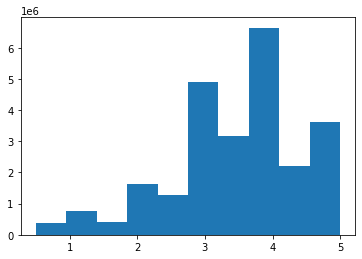

In [37]:
plt.hist(df_ratings['rating'])

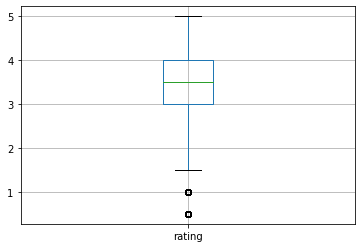

In [38]:
df_ratings.boxplot(['rating'])